In [114]:
import numpy as np
import pandas as pd
import os
from matplotlib import pyplot as plt
from numpy import random as r

from pylab import *
from IPython.core.pylabtools import figsize

import seaborn as sns
import matplotlib.cm as cm

import sys
sys.path.insert(0, '../../utils')
import splicing_utils as spu
import single_cell_plots as scp
from single_cell_plots import *

import matplotlib as mpl
import numpy as np
from matplotlib import pyplot as plt

mpl.rcParams["mathtext.fontset"] = "stix"
mpl.rcParams['pdf.fonttype'] = 42

In [115]:
import importlib
importlib.reload(scp)
importlib.reload(spu)
mpl.rcParams["mathtext.fontset"] = "stix"
mpl.rcParams['pdf.fonttype'] = 42

# Simulations with unimodal underlying $\Psi$

To get the tables in sim1, run the Rscript sim_realistic_data.R

In [133]:
gene_len = np.array([int(x.rstrip()) for x in open('../../../sim1/gene_length.txt').readlines()])

uni_true_counts, uni_true_psi = spu.process_symsim_true('../../../sim1/unimodal_true.tab')
uni_2_counts, uni_2_psi = spu.process_symsim_observed('../../../sim1/unimodal_observed_9.tab', gene_len)
uni_1_counts, uni_1_psi = spu.process_symsim_observed('../../../sim1/unimodal_observed_5.tab', gene_len)
uni_05_counts, uni_05_psi = spu.process_symsim_observed('../../../sim1/unimodal_observed_2.tab', gene_len)
uni_02_counts, uni_02_psi = spu.process_symsim_observed('../../../sim1/unimodal_observed_1.tab', gene_len)
uni_01_counts, uni_01_psi = spu.process_symsim_observed('../../../sim1/unimodal_observed_05.tab', gene_len)

In [134]:
sort_uni_expression = uni_true_counts.mean(axis=1).sort_values().index
bins_uni_true = scp.get_bins_table(uni_true_psi, uni_true_counts)
bins_uni_2 = scp.get_bins_table(uni_2_psi, uni_true_counts)
bins_uni_1 = scp.get_bins_table(uni_1_psi, uni_true_counts)
bins_uni_05 = scp.get_bins_table(uni_05_psi, uni_true_counts)
bins_uni_02 = scp.get_bins_table(uni_02_psi, uni_true_counts)
bins_uni_01 = scp.get_bins_table(uni_01_psi, uni_true_counts)

### All simulated exons

In [135]:
# import importlib
# importlib.reload(scp)
# importlib.reload(spu)
# sns.reset_orig()
# mpl.rcParams["mathtext.fontset"] = "stix"
hist_list = [bins_uni_true[0], bins_uni_2[0], bins_uni_1[0], bins_uni_05[0], bins_uni_02[0], bins_uni_01[0]]
dset_name_list = ["True $\Psi$", "Capture = 0.2", "Capture = 0.1", "Capture = 0.05", "Capture = 0.02", "Capture = 0.01"]

# scp.plot_histograms(hist_list, dset_name_list, fig_len=10, fig_height = 10, ypos1=0.025, ypos2 = 0.625,
#                     plot_dir = 'plots/', plot_name = 'figure_2_unimodal_all_exons',
#                     plot_title = "", 
#                     ylab='Simulated exons', ls=12, sk=1.65, tfs=14, name_size=15)

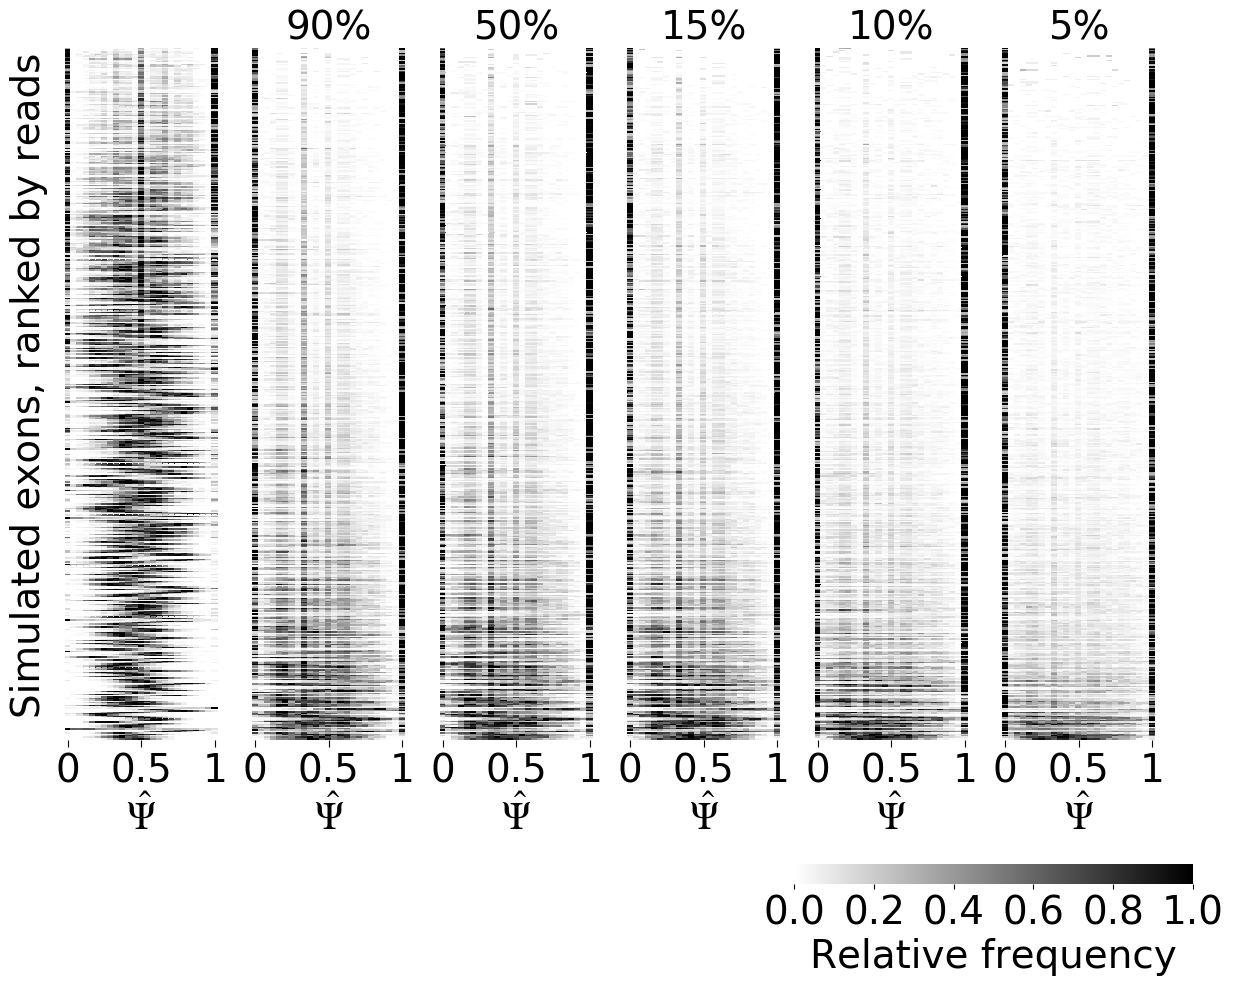

In [136]:
# import importlib
# importlib.reload(scp)
# importlib.reload(spu)
# sns.reset_orig()
# mpl.rcParams["mathtext.fontset"] = "stix"
hist_list = [bins_uni_true[1],  bins_uni_2[1], bins_uni_1[1], bins_uni_05[1], bins_uni_02[1], bins_uni_01[1]]
dset_name_list = ["", "90%", "50%", "25%", "10%", "5%"]

scp.plot_histograms(hist_list, dset_name_list, fig_len=10, fig_height = 12, ypos1=0.025, ypos2 = 0.625,
                    plot_dir = 'plots/', plot_name = 'figure_2_unimodal_intermediate_biases_aver',
                    plot_title = "", 
                    ylab='Simulated exons, ranked by reads', ls=28, sk=3, tfs=20, name_size=28)

### Intermediate simulated exons

../../utils/single_cell_plots.py:904: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout(rect=[0.05, 0.235, 1, 0.95])


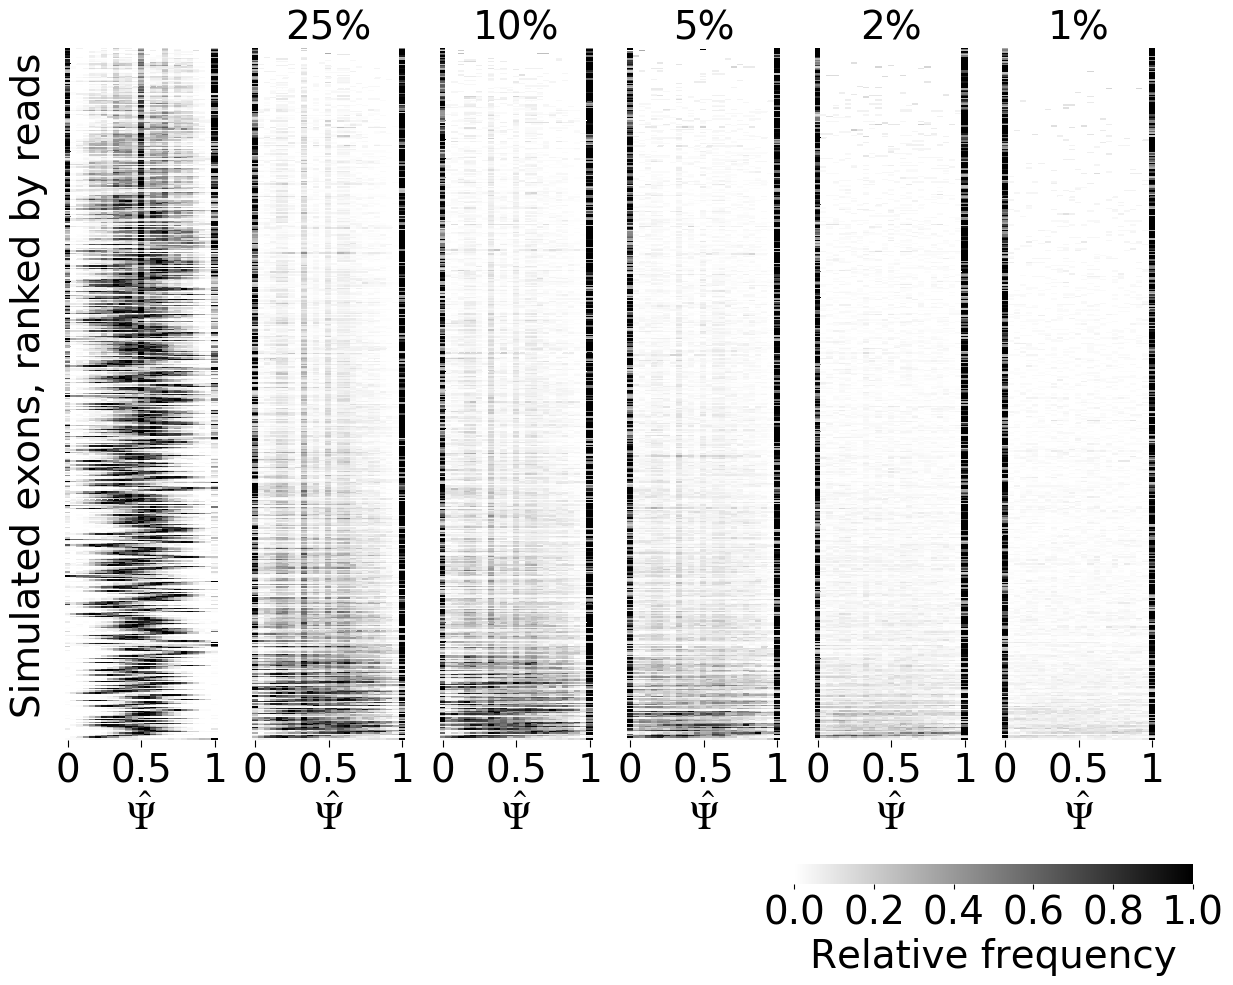

In [98]:
# import importlib
# importlib.reload(scp)
# importlib.reload(spu)
# sns.reset_orig()
# mpl.rcParams["mathtext.fontset"] = "stix"
hist_list = [bins_uni_true[1],  bins_uni_2[1], bins_uni_1[1], bins_uni_05[1], bins_uni_02[1], bins_uni_01[1]]
dset_name_list = ["", "25%", "10%", "5%", "2%", "1%"]

scp.plot_histograms(hist_list, dset_name_list, fig_len=10, fig_height = 12, ypos1=0.025, ypos2 = 0.625,
                    plot_dir = 'plots/', plot_name = 'figure_2_unimodal_intermediate_biases',
                    plot_title = "", 
                    ylab='Simulated exons, ranked by reads', ls=28, sk=3, tfs=20, name_size=28)

### Cell SJ reads vs binary observations

-0.8245659977960035

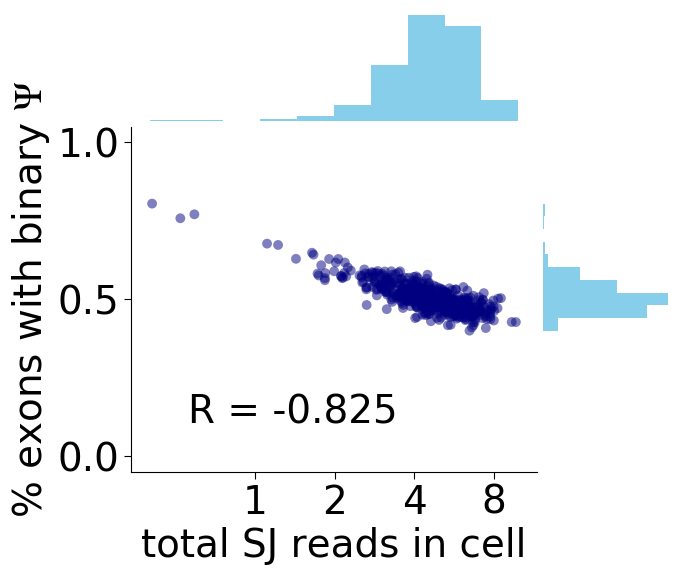

In [99]:
# import importlib
# importlib.reload(scp)

inter = uni_1_psi.loc[(uni_1_psi.mean(axis=1) >= 0.2) & (uni_1_psi.mean(axis=1) <= 0.8)].index

xlocations = [1000, 2000, 4000, 8000]
xtags = ['1', '2', '4', '8']
scp.plot_cell_expression_v_binary(uni_1_psi.loc[inter], uni_1_counts.loc[inter], 'Unimodal', 
                                  'simulated_unimodal_data_intermediate_biases',
                                  xlocations = xlocations, xtags=xtags, xlabel='total SJ reads in cell',
#                                   xlabel='total SJ reads in cell',
                                   
                              plot_dir = 'plots', just_show=False)

-0.8245659977960035

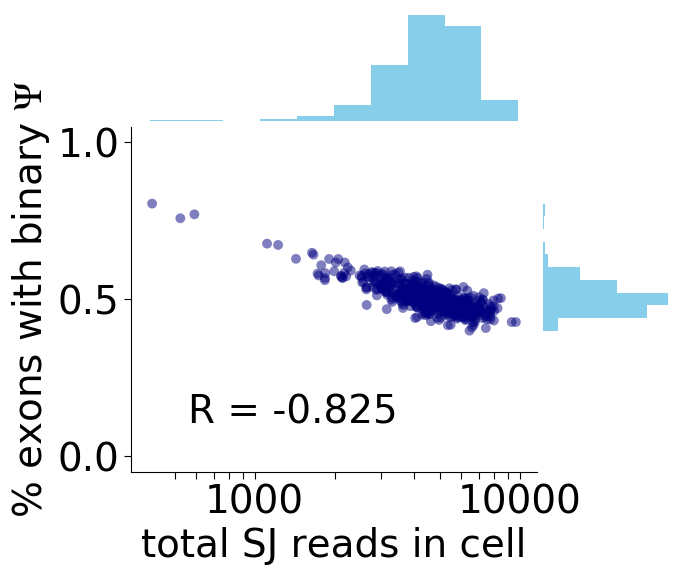

In [100]:
# import importlib
# importlib.reload(scp)
# importlib.reload(spu)
# mpl.rcParams["mathtext.fontset"] = "stix"

inter = uni_1_psi.loc[(uni_1_psi.mean(axis=1) >= 0.2) & (uni_1_psi.mean(axis=1) <= 0.8)].index

xlocations = [500, 600, 700, 800, 900, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000]
scp.plot_cell_expression_v_binary(uni_1_psi.loc[inter], uni_1_counts.loc[inter], 'Unimodal', 
                                  'simulated_unimodal_data_intermediate', 
                                  xtags = ['', '', '', '', '', '1000', '', '', '', '', '', '', '', '', '10000'],
                                  xlocations = xlocations, xlabel='total SJ reads in cell',
#                                   xlabel='total SJ reads in cell',
                                   
                              plot_dir = 'plots', just_show=False)

### Exon SJ v binary observations

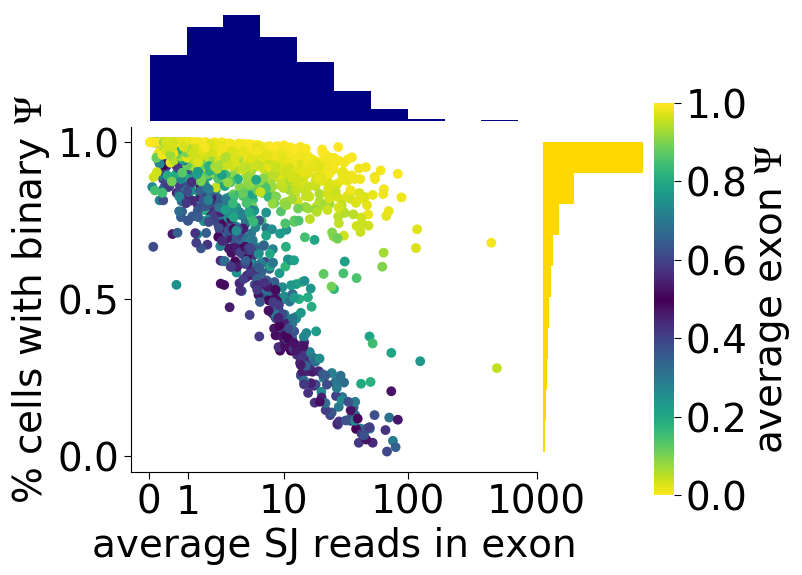

In [101]:
# import importlib
# importlib.reload(scp)
# importlib.reload(spu)
# sns.reset_orig()
# mpl.rcParams["mathtext.fontset"] = "stix"

# figsize(13, 12)

xlocations=[0, 1, 10, 100, 1000]
#xtags = ['25', '50', '100', '200', '400', '800']
scp.plot_ase_expression_v_binary(uni_1_psi, uni_1_counts, 'Unimodal', 'unimodal_simulation', xlocations=xlocations,
                                 xlabel='average SJ reads in exon',
                              plot_dir = 'plots', just_show=False)

plt.show()

# Simulations with bimodal underlying $\Psi$

To get the tables in sim1, run the Rscript sim_realistic_data.R

In [102]:
bim_true_counts, bim_true_psi = spu.process_symsim_true('sim1/bimodal_true.tab')
bim_2_counts, bim_2_psi = spu.process_symsim_observed('sim1/bimodal_observed_2.tab', gene_len)
bim_1_counts, bim_1_psi = spu.process_symsim_observed('sim1/bimodal_observed_1.tab', gene_len)
bim_05_counts, bim_05_psi = spu.process_symsim_observed('sim1/bimodal_observed_05.tab', gene_len)
bim_02_counts, bim_02_psi = spu.process_symsim_observed('sim1/bimodal_observed_02.tab', gene_len)
bim_01_counts, bim_01_psi = spu.process_symsim_observed('sim1/bimodal_observed_01.tab', gene_len)

In [103]:
sort_bim_expression = bim_true_counts.mean(axis=1).sort_values().index
bins_bim_true = scp.get_bins_table(bim_true_psi, bim_true_counts)
bins_bim_2 = scp.get_bins_table(bim_2_psi, bim_true_counts)
bins_bim_1 = scp.get_bins_table(bim_1_psi, bim_true_counts)
bins_bim_05 = scp.get_bins_table(bim_05_psi, bim_true_counts)
bins_bim_02 = scp.get_bins_table(bim_02_psi, bim_true_counts)
bins_bim_01 = scp.get_bins_table(bim_01_psi, bim_true_counts)

### All simulated exons

In [104]:
# import importlib
# importlib.reload(scp)
# importlib.reload(spu)
# sns.reset_orig()
# mpl.rcParams["mathtext.fontset"] = "stix"
hist_list = [bins_bim_true[0], bins_bim_2[0], bins_bim_1[0], bins_bim_05[0], bins_bim_02[0], bins_bim_01[0]]
dset_name_list = ["True $\Psi$", "Capture = 0.25", "Capture = 0.1", "Capture = 0.05", "Capture = 0.02", "Capture = 0.01"]

# scp.plot_histograms(hist_list, dset_name_list, fig_len=10, fig_height = 10, ypos1=0.025, ypos2 = 0.625,
#                     plot_dir = 'plots', plot_name = 'sim7_bimodal',
#                     plot_title = "", 
#                     ylab='Simulated exons', ls=12, sk=1.65, tfs=14, name_size=15)

### Intermediate exons

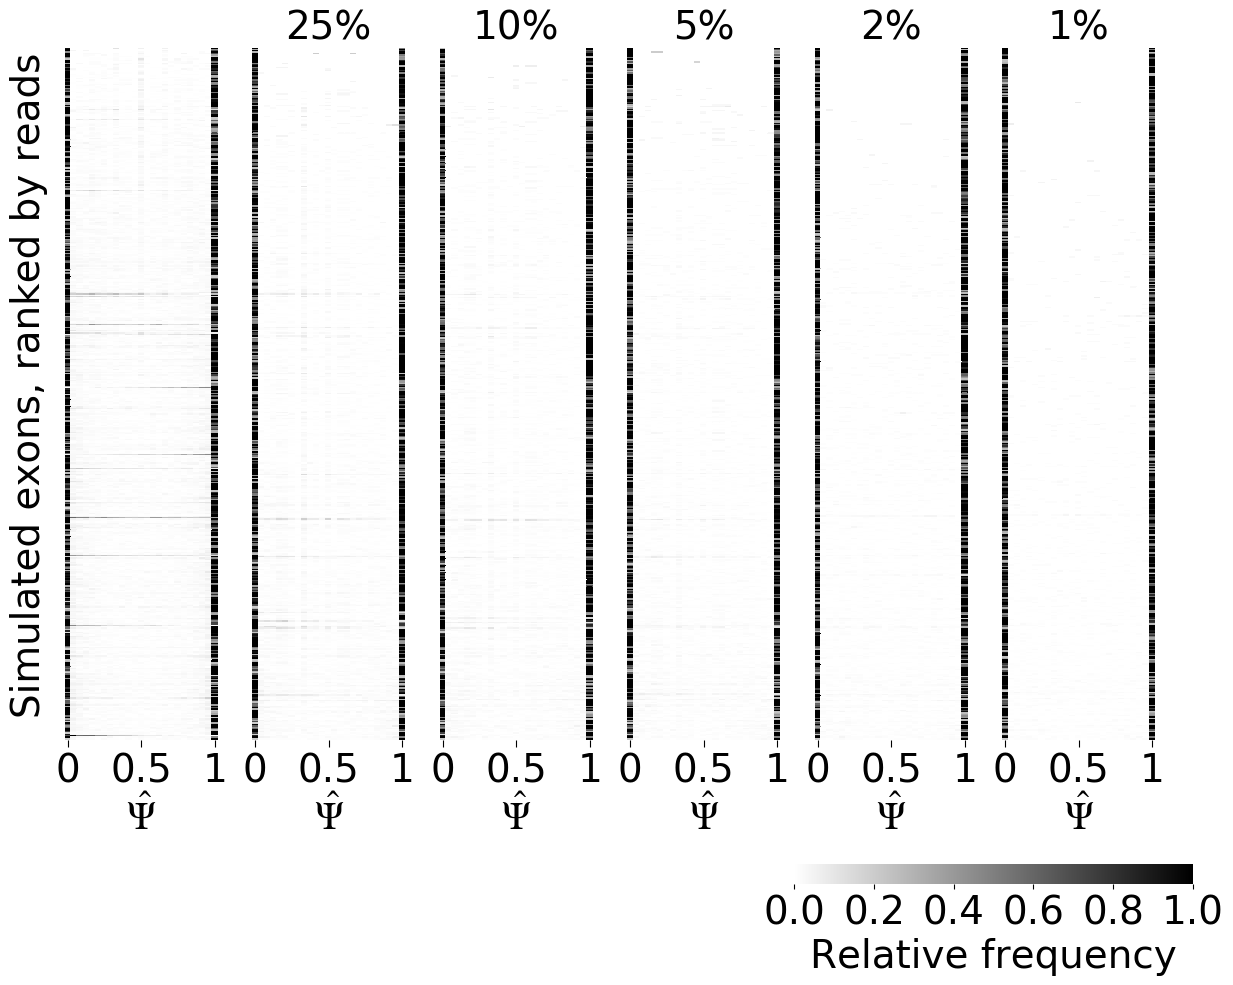

In [105]:
# import importlib
# importlib.reload(scp)
# importlib.reload(spu)
# sns.reset_orig()
# mpl.rcParams["mathtext.fontset"] = "stix"
hist_list = [bins_bim_true[1], bins_bim_2[1], bins_bim_1[1], bins_bim_05[1], bins_bim_02[1], bins_bim_01[1]]
dset_name_list = ["", "25%", "10%", "5%", "2%", "1%"]

scp.plot_histograms(hist_list, dset_name_list, fig_len=10, fig_height = 12, ypos1=0.025, ypos2 = 0.625,
                    plot_dir = 'plots/', plot_name = 'sim7_bimodal_intermediate',
                    plot_title = "", 
                    ylab='Simulated exons, ranked by reads', ls=28, sk=3, tfs=20, name_size=28)




-0.419911969115079

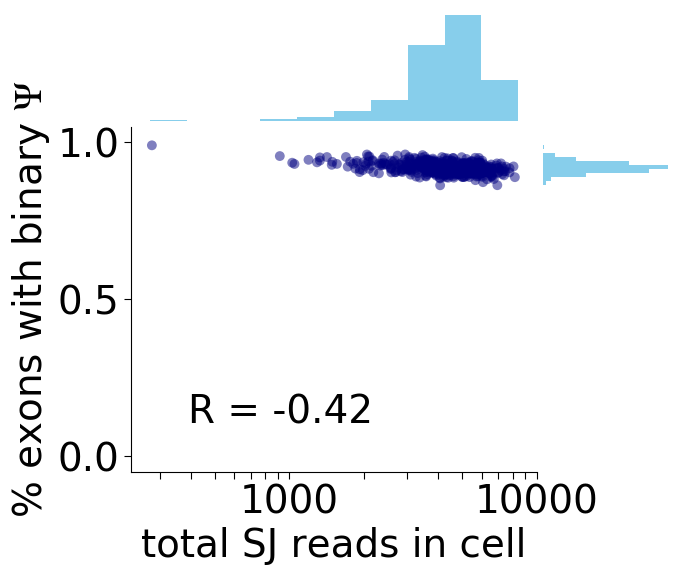

In [106]:
inter = uni_1_psi.loc[(bim_1_psi.mean(axis=1) >= 0.2) & (bim_1_psi.mean(axis=1) <= 0.8)].index
xlocations = [300, 400, 500, 600, 700, 800, 900, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000]
#xtags = ['0.1', '1', '10']
scp.plot_cell_expression_v_binary(bim_1_psi.loc[inter], bim_1_counts.loc[inter], 'Bimodal', 
                                  'simulated_bimodal_data_intermediate', 
                              xlocations = xlocations, xlabel='total SJ reads in cell',#xlocations=[100, 1000, 10000],
                                  xtags=['', '', '', '', '', '', '', '1000', '', '', '', '', '', '', '', '', '10000'],
                                  plot_dir = 'plots', just_show=False)

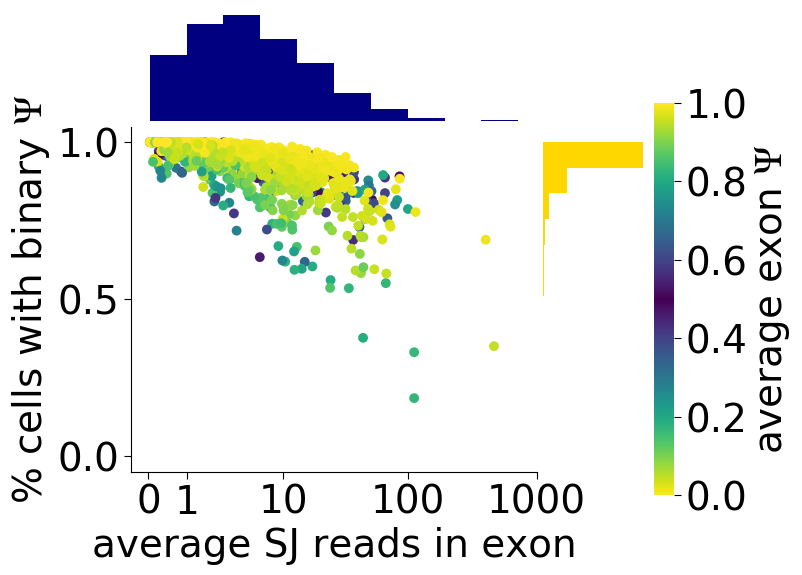

In [107]:
# import importlib
# importlib.reload(scp)
# importlib.reload(spu)
# sns.reset_orig()
# mpl.rcParams["mathtext.fontset"] = "stix"

# figsize(13, 12)

xlocations=[0, 1, 10, 100, 1000]
#xtags = ['25', '50', '100', '200', '400', '800']
scp.plot_ase_expression_v_binary(bim_1_psi, bim_1_counts, 'Bimodal', 'bimodal_simulation', xlocations=xlocations,
                                 xlabel='average SJ reads in exon',
                              plot_dir = 'plots', just_show=False)

plt.show()

In [111]:
uni_1_psi_int = uni_1_psi.loc[(uni_1_psi.mean(axis=1) >= 0.2) & (uni_1_psi.mean(axis=1) <= 0.8)]
uni_05_psi_int = uni_05_psi.loc[(uni_05_psi.mean(axis=1) >= 0.2) & (uni_05_psi.mean(axis=1) <= 0.8)]
uni_02_psi_int = uni_02_psi.loc[(uni_02_psi.mean(axis=1) >= 0.2) & (uni_02_psi.mean(axis=1) <= 0.8)]
uni_01_psi_int = uni_01_psi.loc[(uni_01_psi.mean(axis=1) >= 0.2) & (uni_01_psi.mean(axis=1) <= 0.8)]

/home/cfbuenabadn/anaconda3/lib/python3.6/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The examples.directory rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2. In the future, examples will be found relative to the 'datapath' directory.
  self[key] = other[key]
/home/cfbuenabadn/anaconda3/lib/python3.6/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
/home/cfbuenabadn/anaconda3/lib/python3.6/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
  self[key] = other[key]
/home/cfbuenabadn/anaconda3/lib/python3.6/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
/home/cfbuenabadn/anaconda3/lib/python3.6/_collections_abc.py:841: Matpl

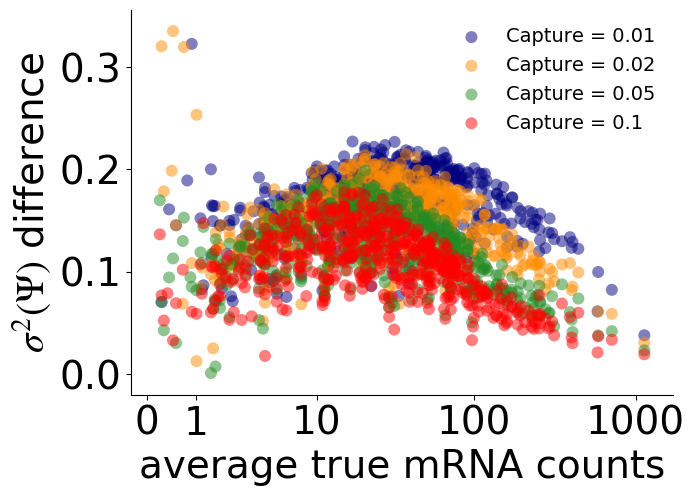

In [112]:
import importlib
importlib.reload(scp)
importlib.reload(spu)
sns.reset_orig()
mpl.rcParams["mathtext.fontset"] = "stix"
# mpl.rcParams['pdf.fonttype'] = 42


fig = plt.figure(figsize=(7,5))

ax  = plt.subplot(1,1,1)



plt.scatter(np.log10(uni_true_counts.loc[uni_01_psi_int.index].mean(axis=1)+1),
    (np.abs(uni_01_psi_int.var(axis=1) - uni_true_psi.loc[uni_01_psi_int.index].var(axis=1))), 
            c='navy', alpha=0.5, label = 'Capture = 0.01', s=75, edgecolors='none')

plt.scatter(np.log10(uni_true_counts.loc[uni_02_psi_int.index].mean(axis=1)+1),
    (np.abs(uni_02_psi_int.var(axis=1) - uni_true_psi.loc[uni_02_psi_int.index].var(axis=1))), 
            c='darkorange', alpha=0.5, label = 'Capture = 0.02', s=75, edgecolors='none')

plt.scatter(np.log10(uni_true_counts.loc[uni_05_psi_int.index].mean(axis=1)+1),
    (np.abs(uni_05_psi_int.var(axis=1) - uni_true_psi.loc[uni_05_psi_int.index].var(axis=1))), 
            c='forestgreen', alpha=0.5, label = 'Capture = 0.05', s=75, edgecolors='none')

plt.scatter(np.log10(uni_true_counts.loc[uni_1_psi_int.index].mean(axis=1)+1), 
            (np.abs(uni_1_psi_int.var(axis=1) - uni_true_psi.loc[uni_1_psi_int.index].var(axis=1))), 
            c='red', alpha=0.5, label = 'Capture = 0.1', s=75, edgecolors='none')



plt.xlabel('average true mRNA counts', fontsize=28)
plt.ylabel('$\sigma^2(\Psi)$ difference', fontsize=28)

plt.legend(frameon=False,  prop={'size': 14})

ax.tick_params(labelsize=28)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
# ax.spines['left'].set_linewidth(2)
# ax.spines['bottom'].set_linewidth(2)

# ax.xaxis.set_tick_params(width=2)
# ax.yaxis.set_tick_params(width=2)

xlocations = [0, 1, 10, 100, 1000]
xlocs = np.array([np.log10(x+1) for x in xlocations])
xtags = [str(i) for i in xlocations]
plt.xticks(xlocs, xtags)

plt.savefig('plots/beta_unif_unimodal_int_variance_diff.svg', bbox_inches='tight', transparent=True)
plt.savefig('plots/beta_unif_unimodal_int_variance_diff.pdf', bbox_inches='tight', transparent=True)
plt.savefig('plots/beta_unif_unimodal_int_variance_diff.png', bbox_inches='tight', transparent=True)

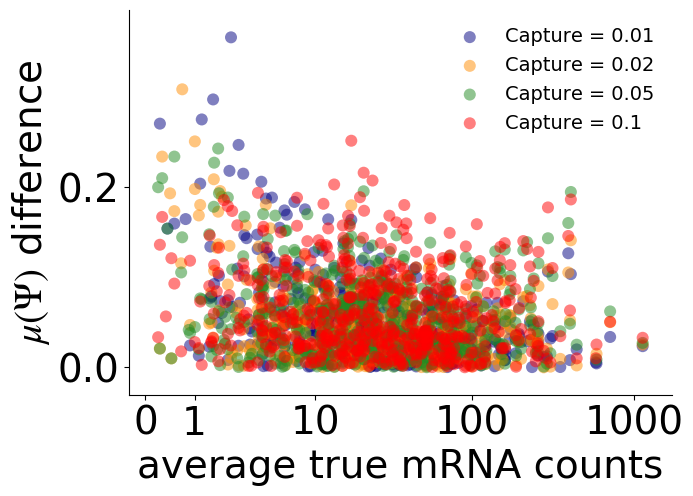

In [113]:
fig = plt.figure(figsize=(7,5))

ax  = plt.subplot(1,1,1)

plt.scatter(np.log10(uni_true_counts.loc[uni_01_psi_int.index].mean(axis=1)+1),
    (np.abs(uni_01_psi_int.mean(axis=1) - uni_true_psi.loc[uni_01_psi_int.index].mean(axis=1))), 
            c='navy', alpha=0.5, label = 'Capture = 0.01', s=75, edgecolors='none')

plt.scatter(np.log10(uni_true_counts.loc[uni_02_psi_int.index].mean(axis=1)+1),
    (np.abs(uni_02_psi_int.mean(axis=1) - uni_true_psi.loc[uni_02_psi_int.index].mean(axis=1))), 
            c='darkorange', alpha=0.5, label = 'Capture = 0.02', s=75, edgecolors='none')

plt.scatter(np.log10(uni_true_counts.loc[uni_05_psi_int.index].mean(axis=1)+1),
    (np.abs(uni_05_psi_int.mean(axis=1) - uni_true_psi.loc[uni_05_psi_int.index].mean(axis=1))), 
            c='forestgreen', alpha=0.5, label = 'Capture = 0.05', s=75, edgecolors='none')

plt.scatter(np.log10(uni_true_counts.loc[uni_1_psi_int.index].mean(axis=1)+1), 
            (np.abs(uni_1_psi_int.mean(axis=1) - uni_true_psi.loc[uni_1_psi_int.index].mean(axis=1))), 
            c='red', alpha=0.5, label = 'Capture = 0.1', s=75, edgecolors='none')


plt.legend(frameon=False,  prop={'size': 14})

ax.tick_params(labelsize=28)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
# ax.spines['left'].set_linewidth(2)
# ax.spines['bottom'].set_linewidth(2)

# ax.xaxis.set_tick_params(width=2)
# ax.yaxis.set_tick_params(width=2)

plt.xlabel('average true mRNA counts', fontsize=28)
plt.ylabel('$\mu(\Psi)$ difference', fontsize=28)

xlocations = [0, 1, 10, 100, 1000]
xlocs = np.array([np.log10(x+1) for x in xlocations])
xtags = [str(i) for i in xlocations]
plt.xticks(xlocs, xtags)


plt.savefig('plots/beta_unif_unimodal_int_mean_diff.svg', bbox_inches='tight', transparent=True)
plt.savefig('plots/beta_unif_unimodal_int_mean_diff.pdf', bbox_inches='tight', transparent=True)
plt.savefig('plots/beta_unif_unimodal_int_mean_diff.png', bbox_inches='tight', transparent=True)